In [11]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


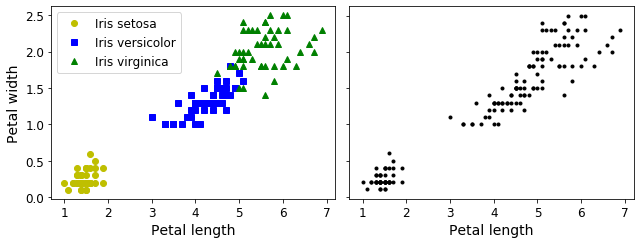

In [3]:

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

In [4]:
### Gaussian Mixture Model

from sklearn.mixture import GaussianMixture

# predict the clusters
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])





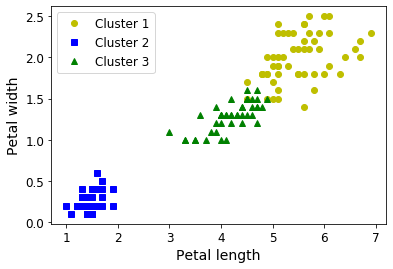

In [5]:
# plot the results
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [6]:
# correct predicted instances
np.sum(y_pred == y)


0

In [7]:
# % of correct 
np.sum((y_pred == y) / len(y_pred))

0.0

### 9.1.1 K-Means


In [8]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


Saving figure blobs_plot


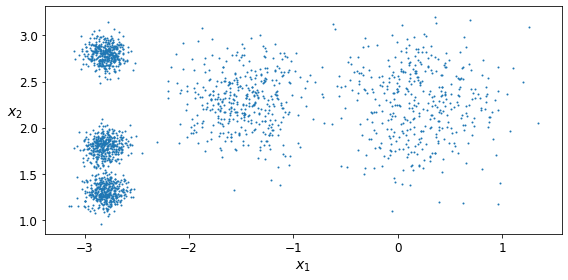

In [9]:
# plot the cluster

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

In [10]:
from sklearn.cluster import KMeans

# Fit and Predict

# train a K-Means clusterer, find centers and assign instances to center
k= 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


In [11]:
y_pred

array([4, 1, 0, ..., 3, 0, 1])

In [12]:
y_pred is kmeans.labels_

True

In [13]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [14]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

kmeans.predict(X_new)

array([0, 0, 3, 3])

In [15]:
### plotting the decision boundaries ( Voronoi Tesselate)

In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


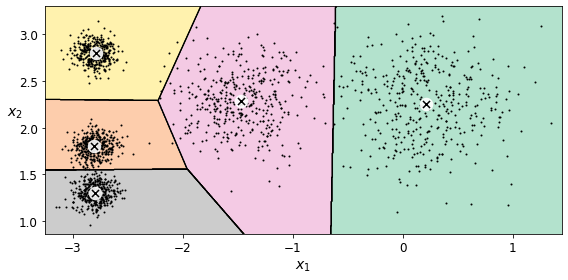

In [17]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

### Hard Clustering vs. Soft

measure the distance to each centroid (of each instance)


In [18]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [19]:
## K_Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.
    
The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.
    
Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [20]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

Saving figure kmeans_algorithm_plot


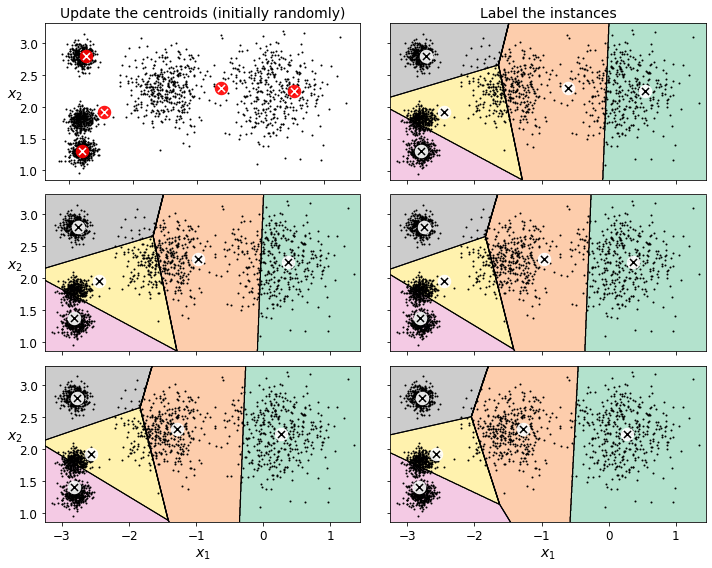

In [21]:
# plot the iterations of kmeans clusterer

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()


In [22]:
### Inertia

# mean squared distance - as performance metric
kmeans.inertia_

# .score() returns neg. inertia (sind utility function must follow 'greater is better' rule
kmeans.score(X)

-211.59853725816845

### Multiple Initializations

When you set the `n_init` hyperparameter, 
Scikit-Learn runs the original algorithm `n_init` 
times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [23]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

### K-Means++

In [24]:
# controlled by hyperparameter init
# k-Means++ by David Arthur default

KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
### Accelerated K-Means

# Elkan method using triangle inequality
# algorithm= 'elkan' (or 'full' slower)

%timeit -n 50 KMeans(algorithm='elkan').fit(X)

132 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Accelerated K-Means

- using triangle inequality
- algorithm = 'elkan'


### Mini Batch K-Means

- learning in batches (simpler solution if data too big for memory -> use memmap class



In [26]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

%timeit -n 50 KMeans(algorithm='full').fit(X)


from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
mini_kmeans.fit(X)

154 ms ± 8.04 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)
173 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

If the dataset does not fit in memory, the simplest option is to use the `memmap` class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:

In [34]:
import urllib
from sklearn.datasets import fetch_openml

# get the MNIST Data and convert labels to int64
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)


In [35]:
# write to 'memmap'
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train


minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=100, random_state=42)
minibatch_kmeans.fit(X_mm)

OSError: [Errno 22] Invalid argument: 'my_mnist.data'

If your data is so large that you cannot use `memmap`, things get more complicated. Let's start by writing a function to load the next batch (in real life, you would load the data from disk):

In [36]:
# function to load data

def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

# train model by feeding one batch at a time 
# (impl. mulitipl initializations & retain model with lowest inertia)

np.random.seed(42)

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans
        
best_kmeans.score(X)

-211.70999744411483

In [37]:
# Mini Batch much faster but worse performance (higher inertia)

100/100Saving figure minibatch_kmeans_vs_kmeans


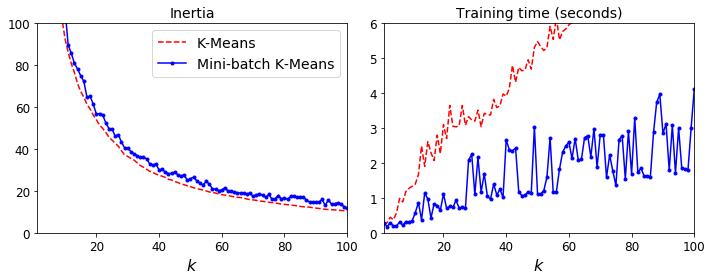

In [38]:
# 1) calculate computing time with each inertia (for KMean and Mini-Batch)

from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_
    
# 2) plot the data for comparison

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

### Finding the optimal number of clusters

1) inertia
- the higher k the lower inertia
- finding the sweet spot at inflexion point / elbow of inertia as a function of k diagramm

2) silhouette score

- mean silhouette coefficient over all instances
- highest silh. score best (if plotted knife-shaped (height = number in cluster, width= close to optimum)



### 9.1.2 Limits of K-Means

- need number of centroid (k)
- initiatzion method tricky (local optimum)
- not working when elliptical clusters (or other non-spherical)

### 9.1.3 Using Clustering for Image Segmentation



In [39]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

# read the image 
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

# reshape image for clusterer
X = image.reshape(-1, 3)

# create and train clusterer
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img


array([[0.02091756, 0.10598001, 0.00559016],
       [0.02091756, 0.10598001, 0.00559016],
       [0.02091756, 0.10598001, 0.00559016],
       ...,
       [0.09118783, 0.24308221, 0.01513819],
       [0.09118783, 0.24308221, 0.01513819],
       [0.02091756, 0.10598001, 0.00559016]], dtype=float32)

Saving figure image_segmentation_diagram


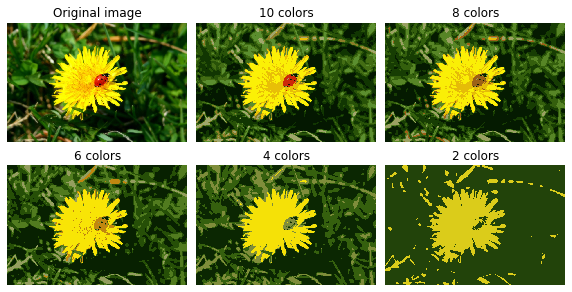

In [40]:
# reshape segmented_img to original shape

segmented_img = segmented_img.reshape(image.shape)

# create data for 10, 8, etc. color centroids
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
    
# plot the data
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

In [41]:
### 9.1.4 Using Clustering for Preprocessing




In [42]:
# get data

from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

# split data train test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [43]:
# train LogReg Model anc evaluate (score()) Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', 
                             max_iter=5000, random_state=42)

log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9688888888888889

this is baseline accuracy of 96.9%

now we create Pipeline, cluster the images with KMeans k=50 and train the logReg with distance to nearest cluster 

In [44]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters= 50, random_state=42)),
    ('logreg', LogisticRegression(multi_class= 'ovr', max_iter=5000, solver='lbfgs', random_state=42))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.98

In [45]:
# difference in accuracy to logReg before

1- (1- 0.9777) / (1- 0.968888)

0.28323476472100906

How about that? We reduced the error rate by over 28%! But we chose the number of clusters $k$ completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance.

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(50, 200))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] kmeans__n_clusters=50 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=50, total=   3.0s
[CV] kmeans__n_clusters=50 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=50, total=   4.0s
[CV] kmeans__n_clusters=50 ...........................................
[CV] ............................ kmeans__n_clusters=50, total=   3.8s
[CV] kmeans__n_clusters=51 ...........................................
[CV] ............................ kmeans__n_clusters=51, total=   3.6s
[CV] kmeans__n_clusters=51 ...........................................
[CV] ............................ kmeans__n_clusters=51, total=   3.2s
[CV] kmeans__n_clusters=51 ...........................................
[CV] ............................ kmeans__n_clusters=51, total=   3.7s
[CV] kmeans__n_clusters=52 ...........................................
[CV] ............................ kmeans__n_clusters=52, total=   3.4s
[CV] kmeans__n_clusters=52 ...........................................
[CV] ............................ kmeans__n_clusters=52, total=   4.0s
[CV] kmeans__n_clusters=52 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=69, total=   3.5s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............................ kmeans__n_clusters=70, total=   4.0s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............................ kmeans__n_clusters=70, total=   4.0s
[CV] kmeans__n_clusters=70 ...........................................
[CV] ............................ kmeans__n_clusters=70, total=   4.0s
[CV] kmeans__n_clusters=71 ...........................................
[CV] ............................ kmeans__n_clusters=71, total=   3.6s
[CV] kmeans__n_clusters=71 ...........................................
[CV] ............................ kmeans__n_clusters=71, total=   4.3s
[CV] kmeans__n_clusters=71 ...........................................
[CV] ............................ kmeans__n_clusters=71, total=   4.7s
[CV] kmeans__n_clusters=72 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=89, total=   3.7s
[CV] kmeans__n_clusters=89 ...........................................
[CV] ............................ kmeans__n_clusters=89, total=   5.0s
[CV] kmeans__n_clusters=89 ...........................................
[CV] ............................ kmeans__n_clusters=89, total=   4.6s
[CV] kmeans__n_clusters=90 ...........................................
[CV] ............................ kmeans__n_clusters=90, total=   4.6s
[CV] kmeans__n_clusters=90 ...........................................
[CV] ............................ kmeans__n_clusters=90, total=   4.6s
[CV] kmeans__n_clusters=90 ...........................................
[CV] ............................ kmeans__n_clusters=90, total=   4.8s
[CV] kmeans__n_clusters=91 ...........................................
[CV] ............................ kmeans__n_clusters=91, total=   5.1s
[CV] kmeans__n_clusters=91 ...........................................
[CV] .

[CV] ........................... kmeans__n_clusters=108, total=   4.2s
[CV] kmeans__n_clusters=108 ..........................................
[CV] ........................... kmeans__n_clusters=108, total=   4.2s
[CV] kmeans__n_clusters=109 ..........................................
[CV] ........................... kmeans__n_clusters=109, total=   4.0s
[CV] kmeans__n_clusters=109 ..........................................
[CV] ........................... kmeans__n_clusters=109, total=   4.7s
[CV] kmeans__n_clusters=109 ..........................................
[CV] ........................... kmeans__n_clusters=109, total=   4.3s
[CV] kmeans__n_clusters=110 ..........................................
[CV] ........................... kmeans__n_clusters=110, total=   4.5s
[CV] kmeans__n_clusters=110 ..........................................
[CV] ........................... kmeans__n_clusters=110, total=   4.8s
[CV] kmeans__n_clusters=110 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=127, total=   4.4s
[CV] kmeans__n_clusters=128 ..........................................
[CV] ........................... kmeans__n_clusters=128, total=   4.4s
[CV] kmeans__n_clusters=128 ..........................................
[CV] ........................... kmeans__n_clusters=128, total=   4.3s
[CV] kmeans__n_clusters=128 ..........................................
[CV] ........................... kmeans__n_clusters=128, total=   3.5s
[CV] kmeans__n_clusters=129 ..........................................
[CV] ........................... kmeans__n_clusters=129, total=   4.2s
[CV] kmeans__n_clusters=129 ..........................................
[CV] ........................... kmeans__n_clusters=129, total=   4.3s
[CV] kmeans__n_clusters=129 ..........................................
[CV] ........................... kmeans__n_clusters=129, total=   3.4s
[CV] kmeans__n_clusters=130 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=147, total=   5.0s
[CV] kmeans__n_clusters=147 ..........................................
[CV] ........................... kmeans__n_clusters=147, total=   4.7s
[CV] kmeans__n_clusters=147 ..........................................
[CV] ........................... kmeans__n_clusters=147, total=   4.2s
[CV] kmeans__n_clusters=148 ..........................................
[CV] ........................... kmeans__n_clusters=148, total=   4.3s
[CV] kmeans__n_clusters=148 ..........................................
[CV] ........................... kmeans__n_clusters=148, total=   5.2s
[CV] kmeans__n_clusters=148 ..........................................
[CV] ........................... kmeans__n_clusters=148, total=   4.3s
[CV] kmeans__n_clusters=149 ..........................................
[CV] ........................... kmeans__n_clusters=149, total=   4.5s
[CV] kmeans__n_clusters=149 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=166, total=   4.6s
[CV] kmeans__n_clusters=166 ..........................................
[CV] ........................... kmeans__n_clusters=166, total=   4.6s
[CV] kmeans__n_clusters=167 ..........................................
[CV] ........................... kmeans__n_clusters=167, total=   4.6s
[CV] kmeans__n_clusters=167 ..........................................
[CV] ........................... kmeans__n_clusters=167, total=   4.8s
[CV] kmeans__n_clusters=167 ..........................................
[CV] ........................... kmeans__n_clusters=167, total=   4.4s
[CV] kmeans__n_clusters=168 ..........................................
[CV] ........................... kmeans__n_clusters=168, total=   4.4s
[CV] kmeans__n_clusters=168 ..........................................
[CV] ........................... kmeans__n_clusters=168, total=   5.0s
[CV] kmeans__n_clusters=168 ..........................................
[CV] .

[CV] ........................... kmeans__n_clusters=185, total=   3.7s
[CV] kmeans__n_clusters=186 ..........................................
[CV] ........................... kmeans__n_clusters=186, total=   4.7s
[CV] kmeans__n_clusters=186 ..........................................
[CV] ........................... kmeans__n_clusters=186, total=   4.6s
[CV] kmeans__n_clusters=186 ..........................................
[CV] ........................... kmeans__n_clusters=186, total=   3.9s
[CV] kmeans__n_clusters=187 ..........................................
[CV] ........................... kmeans__n_clusters=187, total=   4.2s
[CV] kmeans__n_clusters=187 ..........................................
[CV] ........................... kmeans__n_clusters=187, total=   5.1s
[CV] kmeans__n_clusters=187 ..........................................
[CV] ........................... kmeans__n_clusters=187, total=   4.2s
[CV] kmeans__n_clusters=188 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 32.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                       

In [47]:
grid_clf.best_params_

{'kmeans__n_clusters': 195}

In [48]:
grid_clf.score(X_test, y_test)

0.9777777777777777

### 9.1.5 Clustering for Semi-Supervised Learning

- using clusters to label (manually) only a few, but closest to centroid. less tedious manuall work

- possible to propagate labels (all or only 20% closest to centroid)

1. model with n=50 labeled
2. model with cluster and label the image closes to centroid
3. Propagate

In [49]:
# 1. Model with n = 50 labeled images

n_labeled = 50

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', 
                             random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [50]:
# 2. Model with clusters (k = 50) and closest image to clustered labeled manually

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [54]:
X_representative_digits.shape

(100, 64)

Saving figure representative_images_diagram


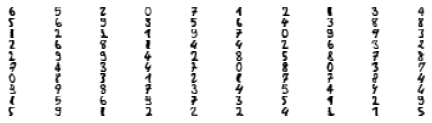

In [51]:
# plot those instances so we can label them

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [52]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

like before only 50 labeled instances, 
but those labels representative image of its cluster

In [53]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [100, 50]

Wow! We jumped from 83.3% accuracy to 92.2%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

- propagate labels to all instances

In [55]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

print(y_train_propagated)

IndexError: index 50 is out of bounds for axis 0 with size 50

In [ ]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', 
                             random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 20th percentile closest to the centroid:

In [ ]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

In [ ]:
log_reg.score(X_test, y_test)

Nice! With just 50 labeled instances (just 5 examples per class on average!), we got 94% performance, which is pretty close to the performance of logistic regression on the fully labeled _digits_ dataset (which was 96.9%).

### Active Learning

- cycles of manually correct instances which yield highest error or affect the system the most

## DBSCAN

In [80]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)


DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [81]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [82]:
len(dbscan.core_sample_indices_)

808

In [83]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [84]:
dbscan.components_[:3]


array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [85]:
# number of density clusters

np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [86]:
# test with bigger epsilon neighborhood
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [87]:
# Plot both DBSCAN results

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


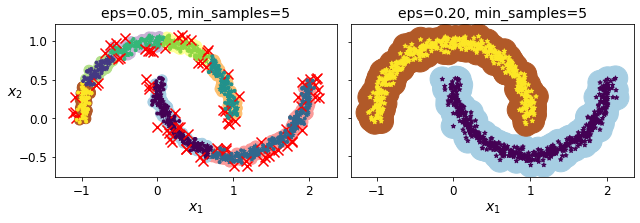

In [88]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


In [89]:
## Train a KNN Model with DBSCAN preprocessed data

# training only on core instances (can also use other depending on task)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [90]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

Saving figure cluster_classification_plot


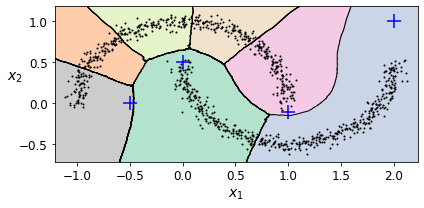

In [91]:
# Plot the KNN with the core instances of DBSCAN and the 4 new X_new instances

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

### SKIPPING

## Other clustering Algorithms 

See Master \ Book

continue with Gaussian Mixtures (new notebook ?)

## Gaussian Mixtures

- probabilistic model (multiple Gaussian regulate the clusters)
- good for elliptical cluster
- k needs to be known before, local optimum risk
- generative model .sample() generate instances
- Likelihood vs probability - MLE and MAP as a "regularized" MLE

In [92]:
from sklearn.datasets import make_blobs

# generate data
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

[[ 0.81672911  1.32719052]
 [ 0.28671649  1.30485269]
 [-1.89804675 -0.00869803]
 ...
 [ 3.00543883  1.09616027]
 [ 4.63362519  1.76621916]
 [ 3.58847848  0.24127634]] [1 1 0 ... 0 0 0]


In [93]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

## values estimated by the EM algo
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [96]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

In [95]:
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [97]:
#  did it converge and how many iterations

print(gm.converged_, gm.n_iter_)

True 4


In [98]:
# hard and soft clustering (with .predict_proba())

print(gm.predict(X))
print(gm.predict_proba(X))

[0 0 2 ... 1 1 1]
[[9.76815996e-01 2.31833274e-02 6.76282339e-07]
 [9.82914418e-01 1.64110061e-02 6.74575575e-04]
 [7.52377580e-05 1.99781831e-06 9.99922764e-01]
 ...
 [4.31902443e-07 9.99999568e-01 2.12540639e-26]
 [5.20915318e-16 1.00000000e+00 1.45002917e-41]
 [2.30971331e-15 1.00000000e+00 7.93266114e-41]]


In [99]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [100]:
# estimate the log of the prob. density function (PDF) 

gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [101]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225095

In [102]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


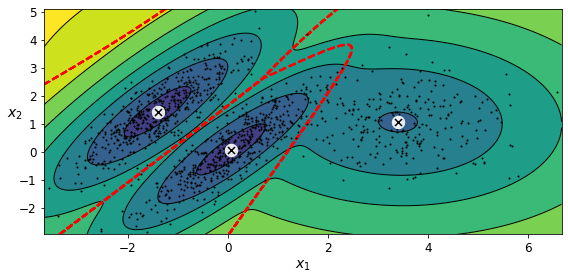

In [103]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

## Anomaly Detection using Gaussian

- in low density regions
- define threshold

In [104]:
densities = gm.score_samples(X)
# create 4% Percentile 
thres = np.percentile(densities, 4)
anomalies = X[densities < thres]

Saving figure mixture_anomaly_detection_plot


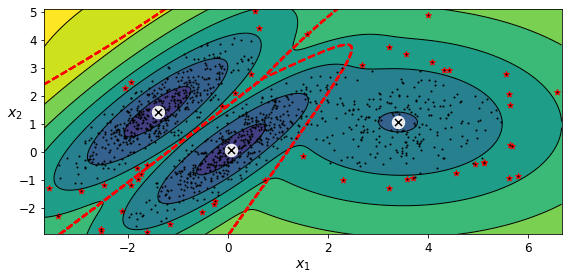

In [105]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

## Selecting the right k

- unlike K-Means no inertia or silhouette coef.
- need Bayesian or Akaike infor. criterion
- both penalize more params



In [107]:
gm.bic(X)

8189.733705221635

In [108]:
gm.aic(X)

8102.508425106597

## Exercise

### 10. Cluster Olivetti Faces Dataset


In [1]:
# get data

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

print(olivetti.DESCR)
#olivetti.target


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

# split train\valid and test part
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]

X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

# split train\valid into train and valid

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, 
                                    random_state=42)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]

X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

print(X_train.shape, X_valid.shape, X_test.shape)

(280, 4096) (80, 4096) (40, 4096)


In [4]:
# to speed things up - dimensionality reduction

# with Principal Component Analysis ( retaining 99% of variance)
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)

X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

200

In [19]:
# cluster the images using K-Means

# 1. generate kmeans for diff. k

from sklearn.cluster import KMeans

kmeans = []
k_ = range(5, 150, 5)

for k in k_:
    kmeans_k = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans.append(kmeans_k)
    
# 2. calculate silhouette coeff for each kmeans per k 

from sklearn.metrics import silhouette_score
sil_score = [silhouette_score(X_train_pca, x.labels_) for x in kmeans]




In [9]:
# choose the best

import numpy as np

best_index = np.argmax(sil_score)

best_k = k_[best_index]

best_score = sil_score[best_index]

print(best_k)


105


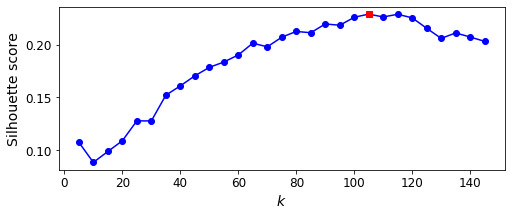

In [12]:


plt.figure(figsize=(8, 3))
plt.plot(k_, sil_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

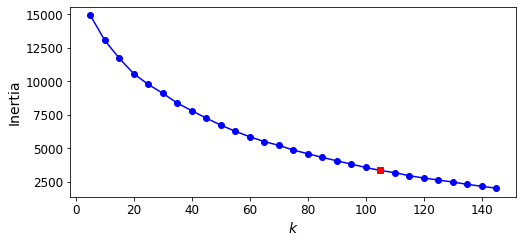

In [13]:
# cross check with inertias (expected to have 40 clusters since 40 diff. faces)

inertias = [x.inertia_ for x in kmeans]

best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

Cluster 0


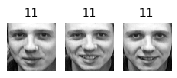

Cluster 1


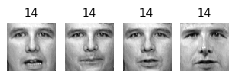

Cluster 2


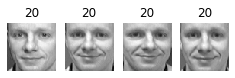

Cluster 3


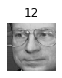

Cluster 4


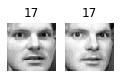

Cluster 5


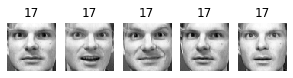

Cluster 6


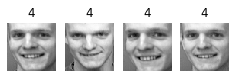

Cluster 7


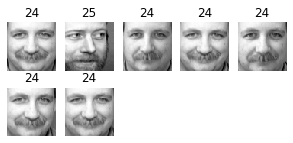

Cluster 8


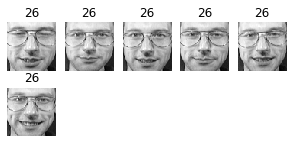

Cluster 9


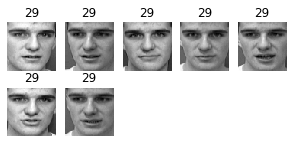

Cluster 10


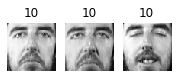

Cluster 11


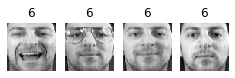

Cluster 12


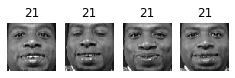

Cluster 13


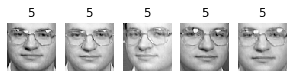

Cluster 14


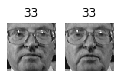

Cluster 15


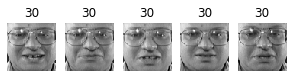

Cluster 16


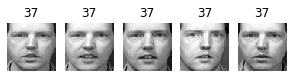

Cluster 17


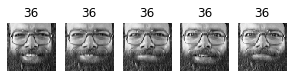

Cluster 18


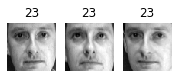

Cluster 19


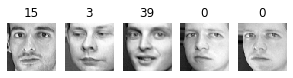

Cluster 20


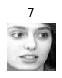

Cluster 21


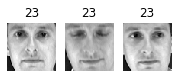

Cluster 22


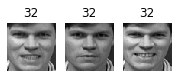

Cluster 23


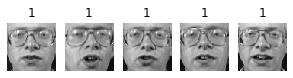

Cluster 24


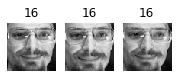

Cluster 25


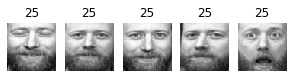

Cluster 26


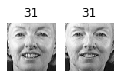

Cluster 27


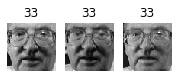

Cluster 28


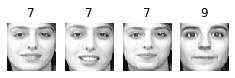

Cluster 29


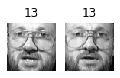

Cluster 30


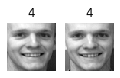

Cluster 31


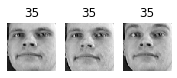

Cluster 32


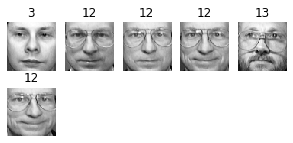

Cluster 33


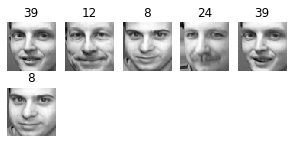

Cluster 34


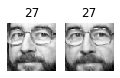

Cluster 35


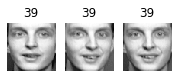

Cluster 36


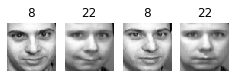

Cluster 37


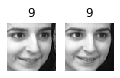

Cluster 38


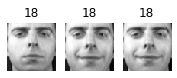

Cluster 39


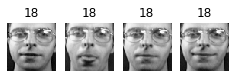

Cluster 40


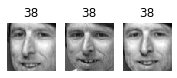

Cluster 41


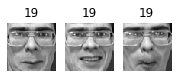

Cluster 42


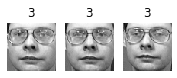

Cluster 43


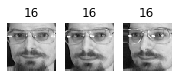

Cluster 44


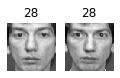

Cluster 45


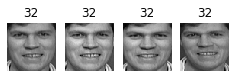

Cluster 46


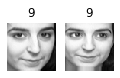

Cluster 47


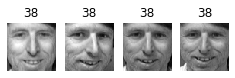

Cluster 48


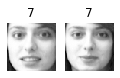

Cluster 49


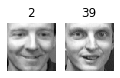

Cluster 50


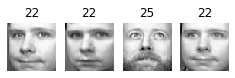

Cluster 51


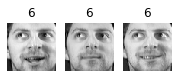

Cluster 52


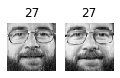

Cluster 53


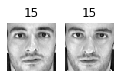

Cluster 54


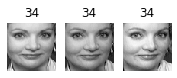

Cluster 55


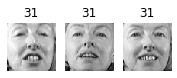

Cluster 56


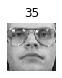

Cluster 57


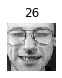

Cluster 58


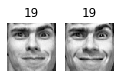

Cluster 59


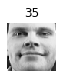

Cluster 60


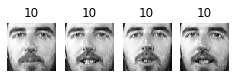

Cluster 61


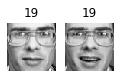

Cluster 62


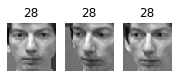

Cluster 63


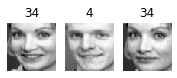

Cluster 64


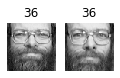

Cluster 65


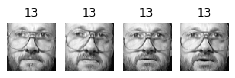

Cluster 66


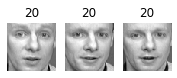

Cluster 67


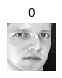

Cluster 68


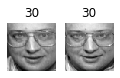

Cluster 69


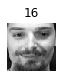

Cluster 70


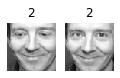

Cluster 71


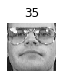

Cluster 72


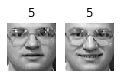

Cluster 73


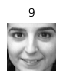

Cluster 74


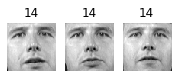

Cluster 75


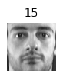

Cluster 76


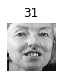

Cluster 77


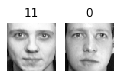

Cluster 78


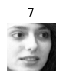

Cluster 79


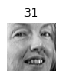

Cluster 80


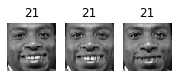

Cluster 81


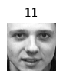

Cluster 82


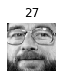

Cluster 83


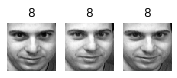

Cluster 84


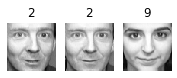

Cluster 85


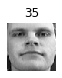

Cluster 86


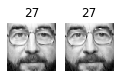

Cluster 87


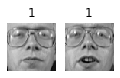

Cluster 88


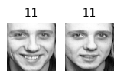

Cluster 89


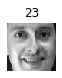

Cluster 90


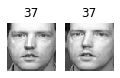

Cluster 91


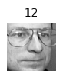

Cluster 92


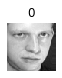

Cluster 93


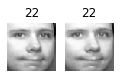

Cluster 94


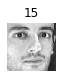

Cluster 95


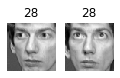

Cluster 96


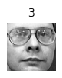

Cluster 97


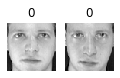

Cluster 98


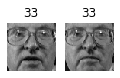

Cluster 99


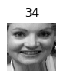

Cluster 100


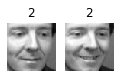

Cluster 101


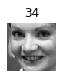

Cluster 102


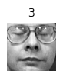

Cluster 103


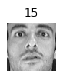

Cluster 104


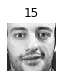

In [14]:
# no real 'elbow'

# so we stick with best model at k = 102

best_model = kmeans[best_index]

# plot all faces

def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)


About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture.

Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

### Exercise 12

continue with olivetti faces and train a classifier (try randomForest), train it and validate on vali_set

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)

clf.score(X_valid_pca, y_valid)


0.9

In [20]:
# use Kmeans as dimensionality reduction

# best_model_kmeans already trained on X_train_pca and ready to 
# transform the data for dimensionality reduction

X_train_red = best_model.transform(X_train_pca)
X_valid_red = best_model.transform(X_valid_pca)
X_test_red = best_model.transform(X_valid_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_red, y_train)

clf.score(X_valid_red, y_valid)

0.75

Exercise: get best numer of clusters
    
- can use GridSearchCV 
- but since only 1 hyperparameter and alread validation set (no need for k-fold validation) simple loop easier


In [21]:
# Option 1

from sklearn.pipeline import Pipeline

"""pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=150, random_state=42))
])
param_grid = dict(kmeans__n_clusters=range(5, 150, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
"""


# Option 2 : simple loop

for x in k_:
    pipeline = Pipeline([
        ('kmeans', KMeans(n_clusters=x, random_state=42)),
        ('clf', RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    
    print(x, pipeline.score(X_valid_pca, y_valid))

5 0.4625
10 0.4125
15 0.5125
20 0.5375
25 0.6
30 0.6625
35 0.7125
40 0.6875
45 0.7
50 0.675
55 0.7
60 0.7125
65 0.7125
70 0.7125
75 0.675
80 0.7375
85 0.7125
90 0.7375
95 0.7125
100 0.725
105 0.75
110 0.725
115 0.7125
120 0.725
125 0.7375
130 0.7
135 0.725
140 0.7125
145 0.725


In [22]:
X_train_ext = np.c_[X_train_pca, X_train_red]

X_valid_ext = np.c_[X_valid_pca, X_valid_red]

X_test_ext = np.c_[X_valid_pca, X_valid_red]

clf = RandomForestClassifier(n_estimators=150, random_state=42)

clf.fit(X_train_ext, y_train)
clf.score(X_valid_ext, y_valid)

0.7625

That's a bit better, but still worse than without the cluster features. The clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances).

## Ex. 12 Gaussian Mixture for Olivetti Faces

#### 1. Train Gaussian Mixture on Olivetti Data with dim. reduction w 99% varaiance retained

data X_train_pca can be used


In [25]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)
y_pred

array([23, 13, 10, 24,  5, 14, 17,  5,  0, 10, 12,  5, 22, 37, 31, 39, 32,
       22,  1, 23, 13, 29, 26, 32, 27, 13, 33,  1, 33, 13, 28, 30, 12,  7,
       35, 21, 28, 19, 21,  1,  1,  0, 19,  1, 23, 37, 39,  9,  1, 13,  2,
        5,  9, 14, 39, 10,  6,  0, 12,  7, 26, 37, 13, 39, 16, 16, 19, 32,
       36,  8, 27, 31,  1, 19, 32, 10, 27, 32,  2, 26, 10, 17,  1,  6, 16,
       32, 31, 38, 27, 34,  5, 30,  2,  1,  4, 15, 37, 16, 16, 14, 17,  2,
        0,  7, 20, 34, 22, 19,  5,  2, 13, 22, 33, 27,  9, 17, 21,  4,  5,
        9, 25,  1, 26, 16,  1, 24, 39,  4, 11, 26, 26,  4, 38, 10, 18,  1,
       16, 22, 26,  9, 19,  7, 27,  4,  2, 37, 22,  2, 39, 17,  3,  3, 34,
       10, 11,  6, 28, 22, 28, 37,  4, 18, 21, 17,  1, 10, 39, 21,  8,  9,
        8, 10, 14, 26,  7, 34, 32, 18, 18,  1, 11, 11,  1, 19,  1,  2, 28,
        9,  9,  5, 12, 16,  5,  7, 31, 14, 14,  3,  6, 26,  9, 12, 27, 10,
        1, 30, 20,  8, 25,  4, 25, 19, 14,  1,  9,  7, 29, 16,  9, 28, 30,
        5,  3, 28,  1, 39

In [28]:
# 2. generate new faces 

n_new_faces = 10

new_faces_raw, y_new_faces = gm.sample(n_samples=n_new_faces)

new_faces = pca.inverse_transform(new_faces_raw)


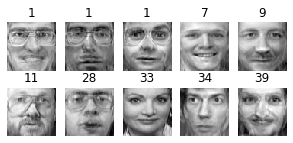

In [29]:
plot_faces(new_faces, y_new_faces)

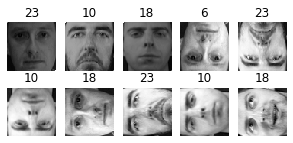

In [46]:
# 3. modify images (rotate, flip, darken)

n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped= X_train[:n_flipped].reshape(-1, 64, 64)[:,::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

"""n_brighten = 3
brightend = X_train[:n_brighten].copy()
brightend[:, 1:-1] *= 1.1
brightend = brightend.reshape(-1, 64*64)
y_brightend = y_train[:n_brighten]"""

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.2
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

# combine bad faces together ( add brightened if needed)

X_bad = np.r_[darkened, flipped, rotated]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad, y_bad)

In [47]:
X_bad_pca = pca.transform(X_bad)

gm.score_samples(X_bad_pca)

array([-1.49618819e+08, -1.21140331e+08, -1.23024538e+08, -3.21480252e+07,
       -4.40347084e+07, -3.77418658e+07, -5.00460710e+07, -3.43436722e+07,
       -3.46924243e+07, -4.30346034e+07])

The bad faces are all considered highly unlikely by the Gaussian Mixture model. Compare this to the scores of some training instances:

In [48]:
gm.score_samples(X_train_pca[:10])

array([1177.0298418 , 1139.43960995, 1116.17012459, 1176.66453401,
       1096.60379673, 1146.18455629, 1146.03684107, 1096.60384492,
       1168.65018039, 1116.17012219])

### Ex. 13 
#### Using Dim. Reduction for Anomaly detection

- reduce Dimen. w 99% variance preserved
- compute reconstruction error
- use bad_faces and compute reconstr. error
- compare


In [51]:
# already have dimen. reduction w PCA

X_train_pca

def reconstruction_error(pca, X):
    X_pca = pca.transform(X)
    X_recons = pca.inverse_transform(X_pca)
    mse = (X_recons - X).mean(axis=1)
    return mse

print(reconstruction_error(pca, X_train).mean())
print(reconstruction_error(pca, X_bad).mean())


1.3924104e-09
8.993656e-05


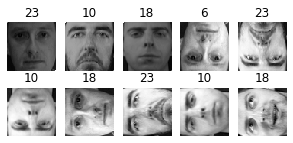

In [52]:
plot_faces(X_bad, y_bad)

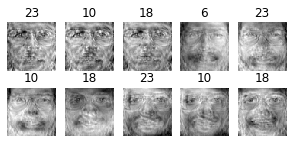

In [54]:
X_bad_recon = pca.inverse_transform(X_bad_pca)
plot_faces(X_bad_recon, y_bad)